# Реализация градиентного спуска (steepest descent)

Для реализации градиентного спуска в общем виде нужно зафиксировать его сигнатуру. Скажем, что градиентный спуск принимает: оптимизируемую функцию, функцию для подсчёта градиента, исходную точку, функцию для линейного поиска, функцию реализующую терминирующие условия и возвращает массив полученных точек. Такой общности будет достаточно для нужд данной работы. Непосредственная реализация такой функции довольно тривиальна.

## Градиентный спуск с фиксированным шагом (learning rate)

Для реализации данного метода достаточно реализовать подходящий метод линейного поиска. Он тривиален: нужно просто вернуть заданную константу.
Рассмотрим поведение данного метода на различных функциях и с различной длиной шага. Проведём тесты на следующих функциях:
$f(x, y) = \alpha(x - 5)^2 + (y - 7)^2$
$f(x, y) = \sin(0.5 x^2 - 0.25 y^2 + 3)\cos(2x+1-\exp(y))$
$f(x, y) = 100(y - x^2)^2 + (1-x)^2$ (функция Розенброка)

In [33]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Best value found: x* = [5.         6.99961464] with f(x*) = 1.4849992267483374e-07
Best value found: x* = [-0.79056603 -0.40816302] with f(x*) = -0.04113237071314241
Best value found: x* = [-67214674.60000001    282455.25      ] with f(x*) = 2.0410629616202993e+33


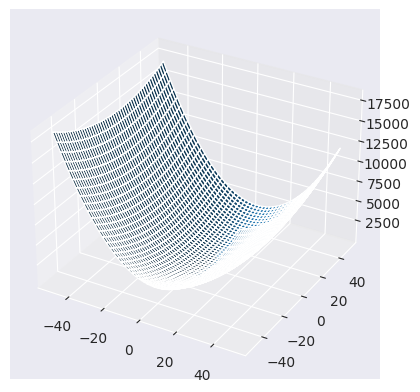

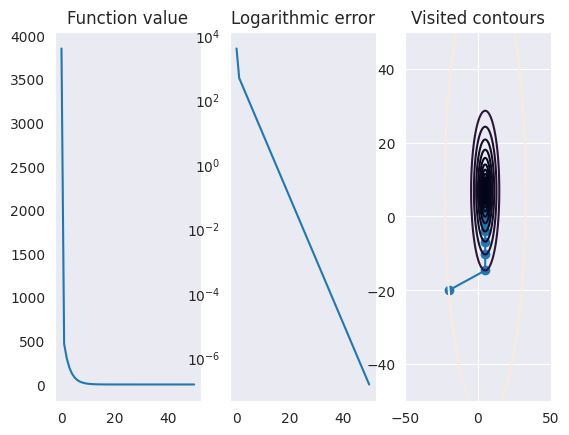

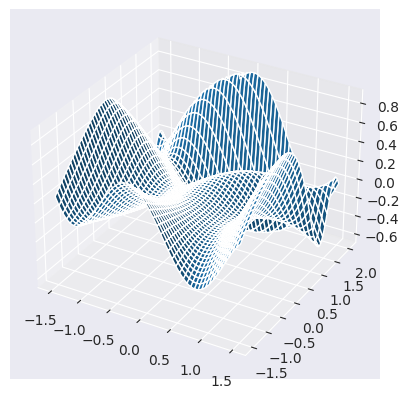

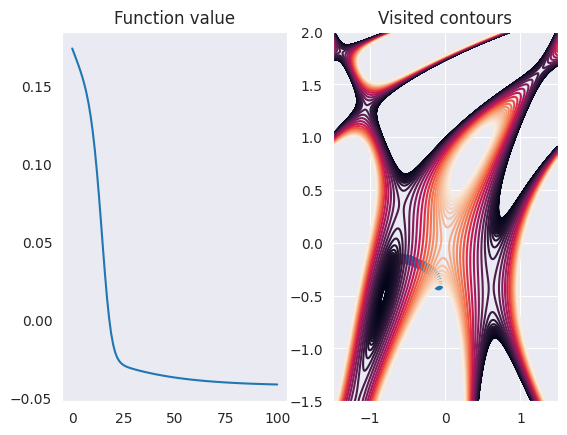

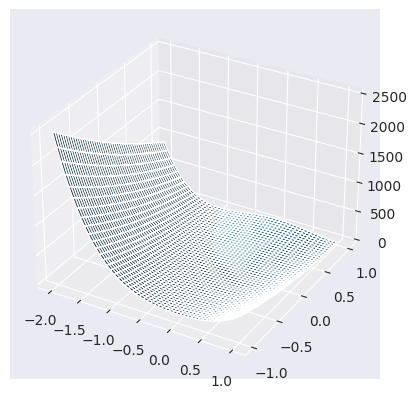

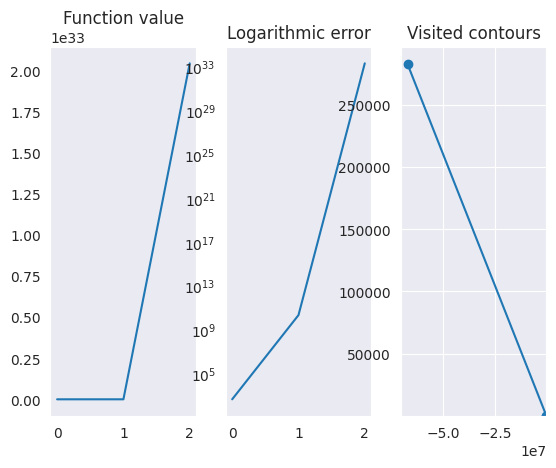

In [34]:
test_linear_search(fixed_step_search(0.1))

Best value found: x* = [ 4.87115562 -2.83258136] with f(x*) = 96.7626606187988
Best value found: x* = [-0.26557737 -0.23993712] with f(x*) = 0.1143949004668477
Best value found: x* = [3.66262233e+11 4.06305040e+07] with f(x*) = 1.7995692230052147e+48


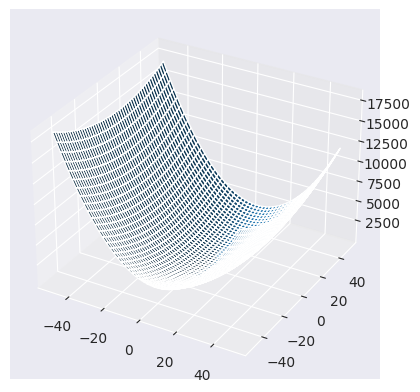

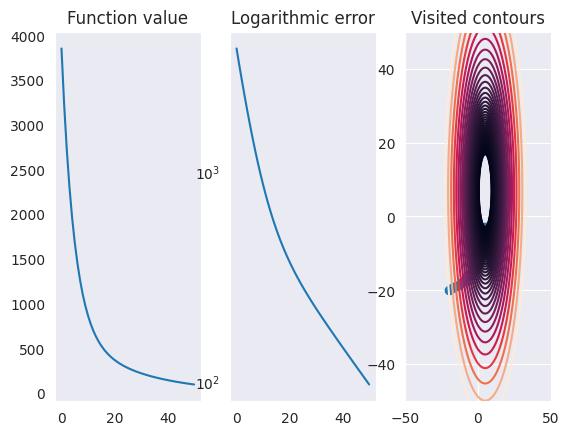

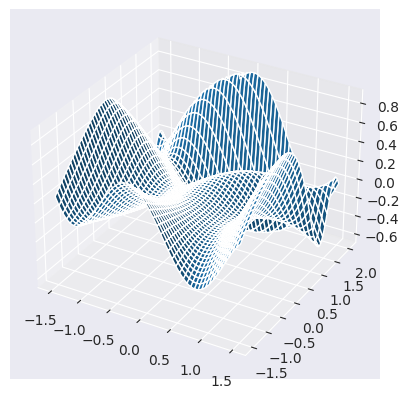

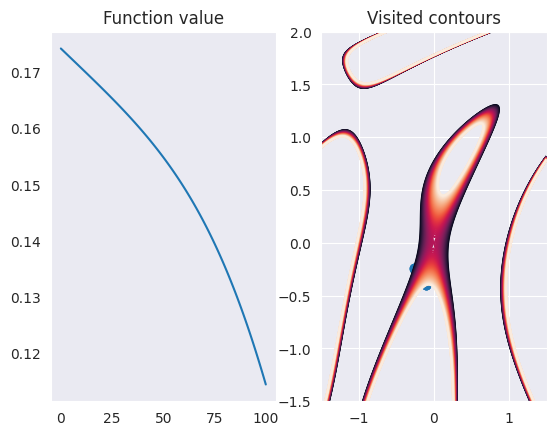

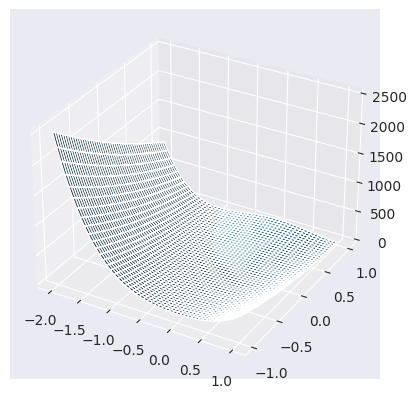

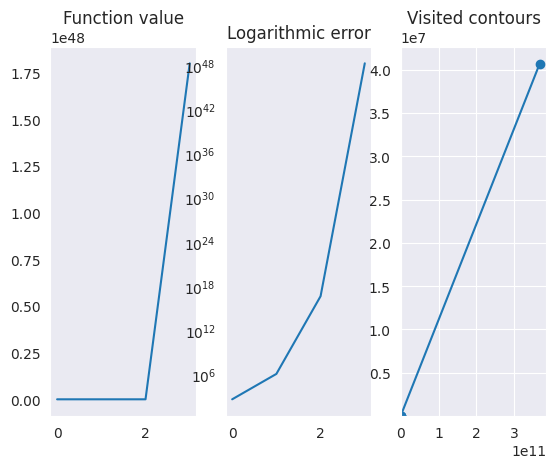

In [35]:
test_linear_search(fixed_step_search(0.01))

Best value found: x* = [-10.12515168 -17.42816409] with f(x*) = 1740.5862670967067
Best value found: x* = [-0.10596173 -0.38225715] with f(x*) = 0.17069544604231845
Best value found: x* = [-0.52504441  0.28332622] with f(x*) = 2.3316197339595957


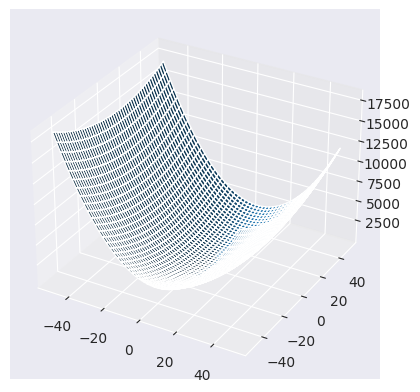

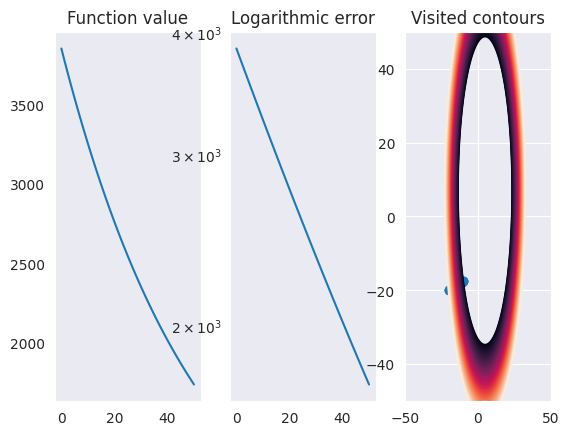

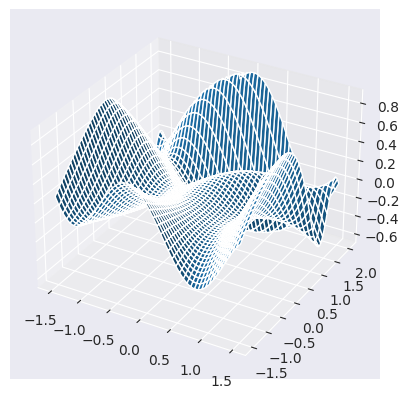

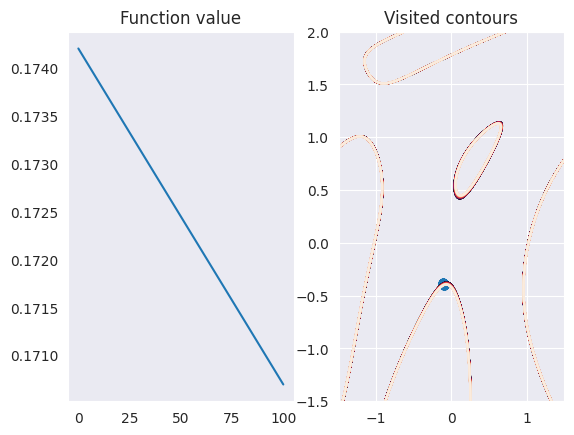

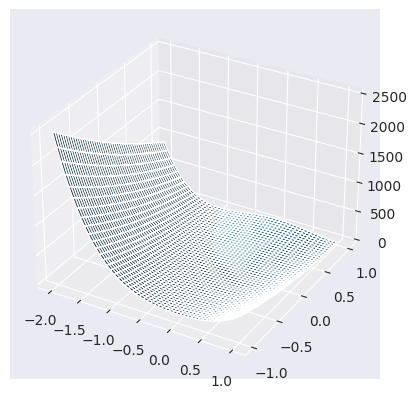

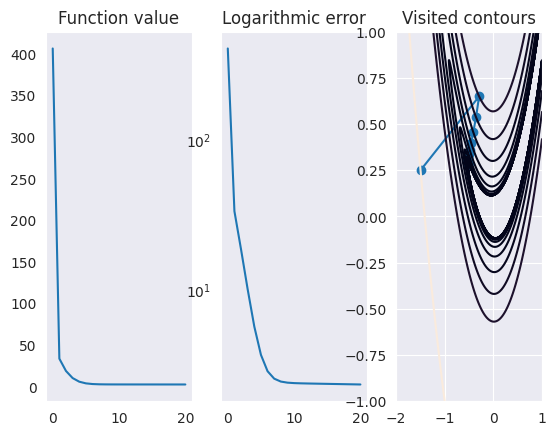

In [36]:
test_linear_search(fixed_step_search(0.001))

## Другие методы одномерного поиска

### Метод дихотомии (двоичного поиска)
Метод дихотомии подходит для нахождения точного минимума унимодальной функции. В его реализации требуется зафиксировать отрезок, внутри которого обязан лежать минимум, а затем делить его пополам, выбирая для следующей итерации правую либо левою часть, в зависимости от значения производной в середине. Сужение заканчивается, когда длина полученного отрезка становится меньше заранее заданного $\varepsilon$. Для выбора размера изначального отрезка будем постепенно увеличивать длину отрезка, ожидая, что после какого-то из увеличений значение функции на конце увеличится, а значит минимум оказался внутри.


Best value found: x* = [5. 7.] with f(x*) = 4.733165431326071e-30
Best value found: x* = [0.32274239 1.60240824] with f(x*) = -0.6574000294758515
Best value found: x* = [1.04589455 1.09398515] with f(x*) = 0.0021071149369510517


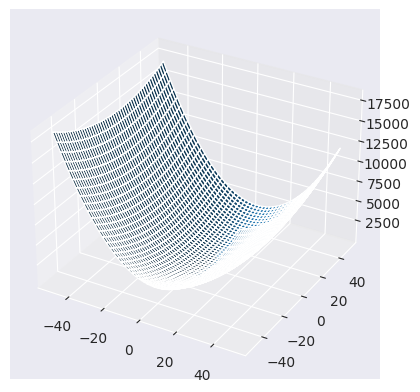

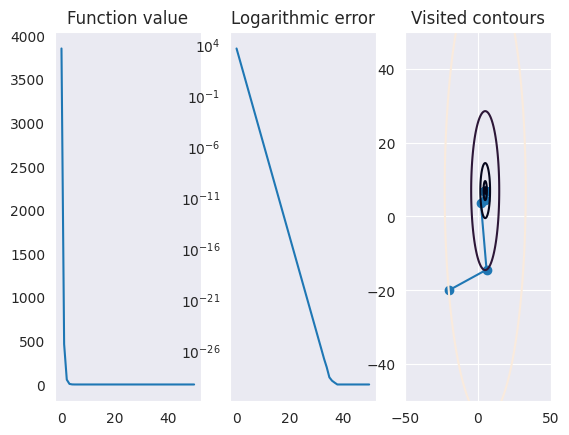

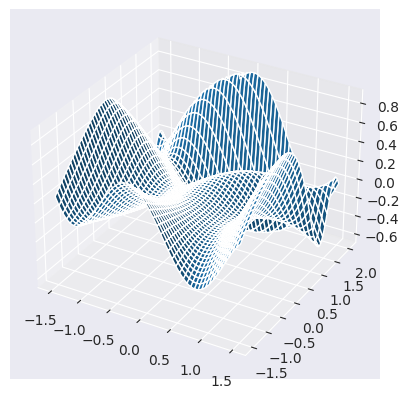

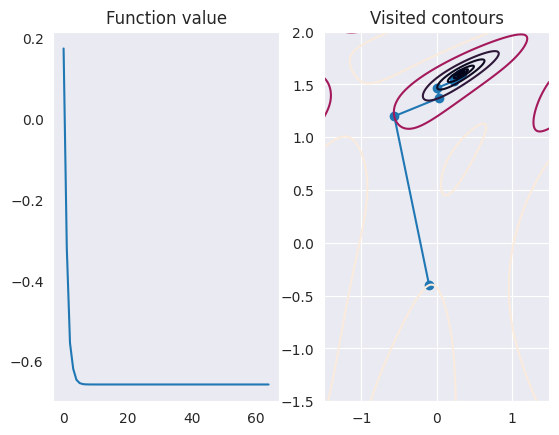

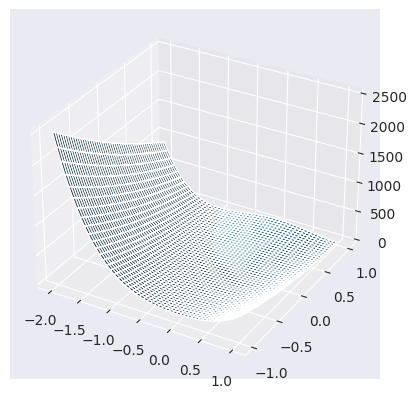

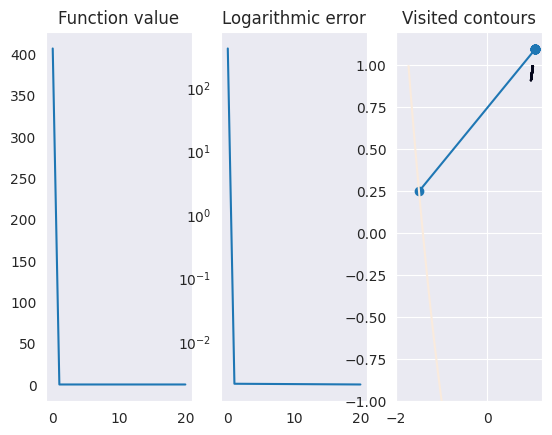

In [37]:
test_linear_search(bin_search)

### Метод золотого сечения
Метод золотого сечения также используется для поиска минимума унимодальной функции, однако в отличии от метода дихотомии он не требует вычисления производной.
Зафиксируем отрезок, в котором обязан лежать минимум. Затем будет сужать его с помощью следующей процедуры: фиксируются две точки $x_1, x_2: \frac{b - a}{x_2 - a} = \frac{b - a}{b - x_1} = \varphi$, затем из отрезка удаляется $\left[a,x_1 \right]$ либо $\left[x_2, b\right]$ в зависимости от того, какое из значений $\{f(x_1), f(x_2)\}$ больше.

Best value found: x* = [5. 7.] with f(x*) = 4.733165431326071e-30
Best value found: x* = [0.32274241 1.60240825] with f(x*) = -0.6574000294758527
Best value found: x* = [1.04589423 1.09398373] with f(x*) = 0.0021070722978082973


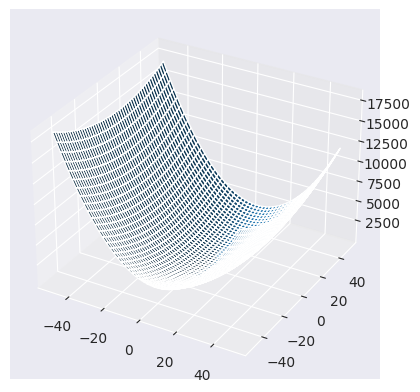

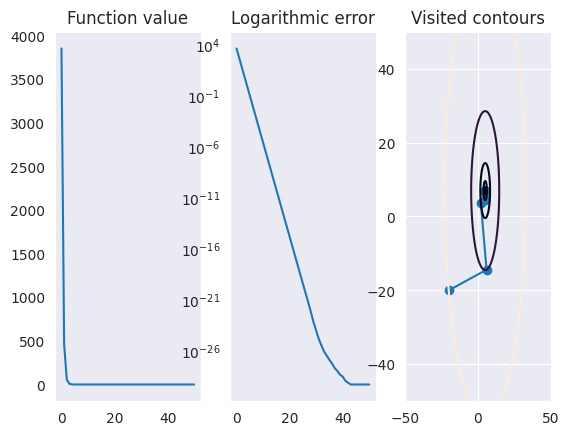

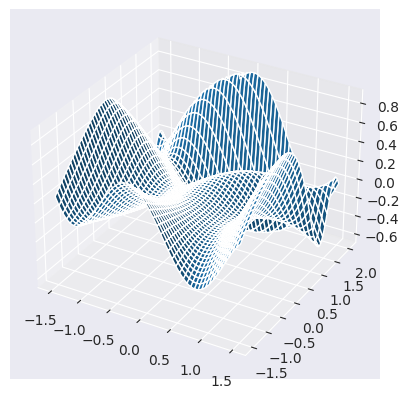

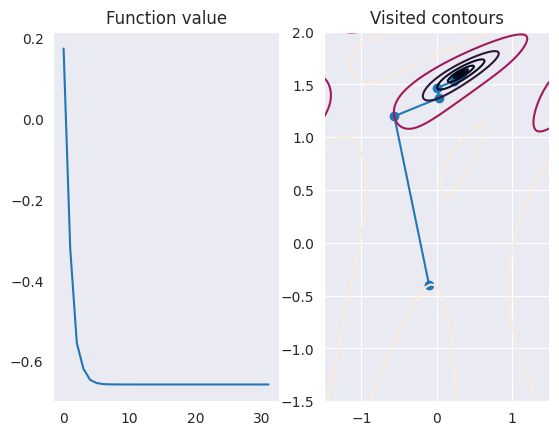

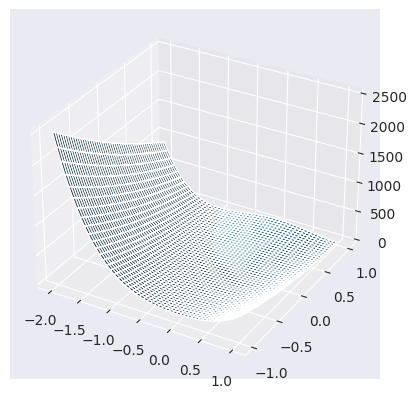

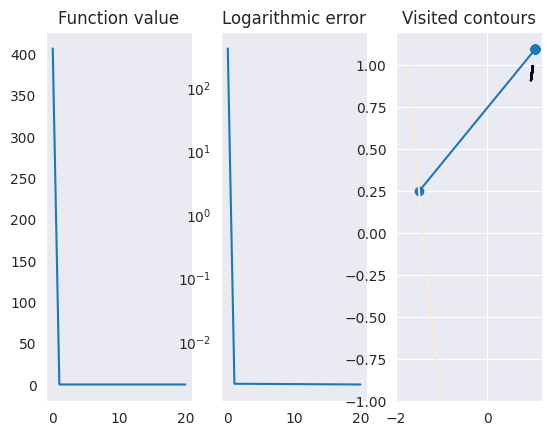

In [38]:
test_linear_search(golden_ratio_search)

### Метод Фибоначчи
Метод Фибоначчи является модификацией метода золотого сечения, в котором $x_1$ и $x_2$ мы выбираем используя не точное значение $\varphi$, а отношение соседних чисел из последовательности Фибоначчи, а так же сужение проводится не до достижения требуемой точности, а количество итераций зафиксировано заранее. Строго говоря, на итерации алгоритма с номером $k$
$\frac{b - a}{x_2 - a} = \frac{F_{n - k + 1}}{F_{n - k}}, \frac{b - a}{b - x_1} = \frac{F_{n - k + 1}}{F_{n - k - 1}}$, где $n$ - количество итераций

Best value found: x* = [5. 7.] with f(x*) = 0.0
Best value found: x* = [0.32274245 1.60240827] with f(x*) = -0.6574000294758536
Best value found: x* = [1.04589456 1.09398521] with f(x*) = 0.0021071167191768964


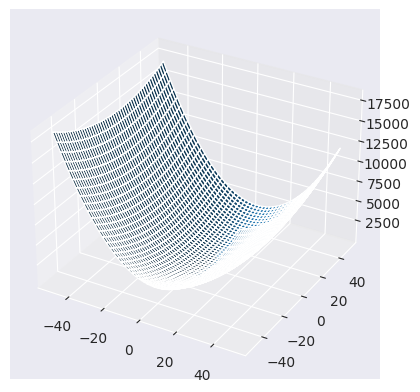

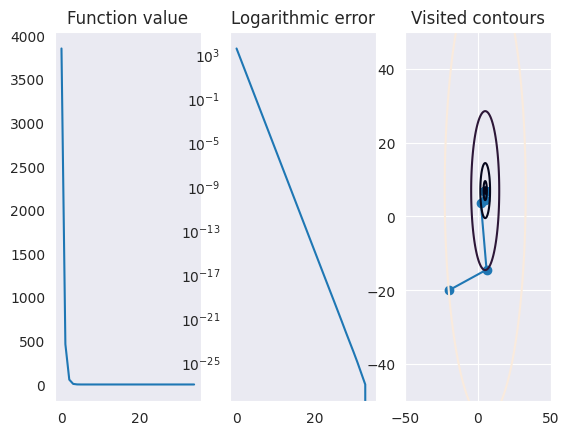

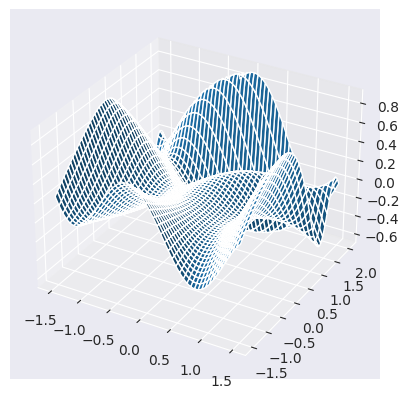

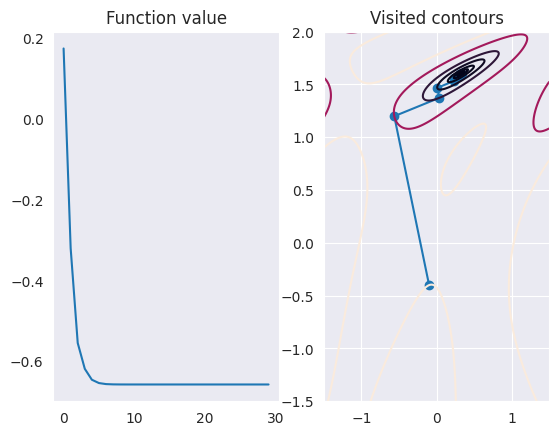

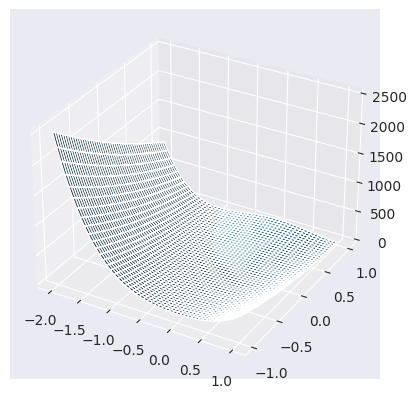

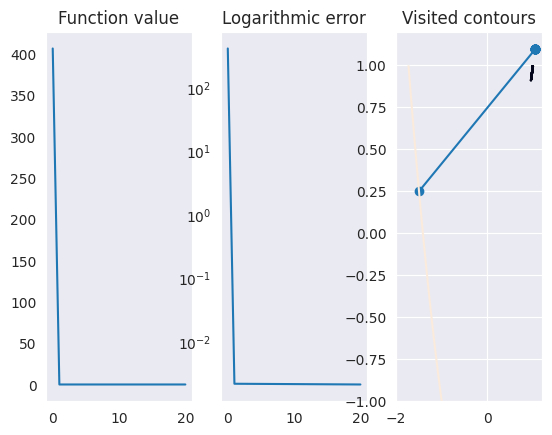

In [39]:
test_linear_search(fibonacci_search(50))